In [2]:
from frontiers_yildizetal.emulators import *
from pkg_resources import resource_filename
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
acheron1 = ScalarEmulators('acheron',h_threshold=0.1, loc_x=1490100, loc_y=5204100)
acheron2 = ScalarEmulators('acheron',h_threshold=0.1, loc_x=1490940, loc_y=5203740)
acheron3 = ScalarEmulators('acheron',h_threshold=0.1, loc_x=1490000, loc_y=5203740)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.
Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.
Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [4]:
path = 'files/input/input_mcs3_acheron.csv'
filepath = resource_filename('frontiers_yildizetal', path)
input_mcs3 = pd.read_csv(filepath)
input_mcs3.columns = ['coulomb','turbulent','volume']

In [5]:
scalars1 = list(acheron1.output.columns)
scalars2 = list(acheron2.output.columns)
scalars3 = list(acheron3.output.columns)

predicted1 = {}
for scalar in scalars1:
    predicted1[scalar] = acheron1.predict_scalar(scalar,input_mcs3.to_numpy())[0]

predicted2 = {}
for scalar in scalars2:
    predicted2[scalar] = acheron2.predict_scalar(scalar,input_mcs3.to_numpy())[0]
    
predicted3 = {}
for scalar in scalars3:
    predicted3[scalar] = acheron3.predict_scalar(scalar,input_mcs3.to_numpy())[0]

The upper bounds of the range parameters are 8.405995 62880.45 193.5565 
The initial values of range parameters are 0.1681199 1257.609 3.871131 
Start of the optimization  1  : 
The number of interation is  33 
 The value of the posterior is  22.29441 
 Optimized range parameters are 0.106818 1548.345 7.230434 
 Optimized nugget parameter is 0 
 Convergence:  FALSE 
The initial values of range parameters are 0.07730886 578.3035 1.780115 
Start of the optimization  2  : 
The number of interation is  14 
 The value of the posterior is  22.29441 
 Optimized range parameters are 0.106818 1548.345 7.230434 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The upper bounds of the range parameters are 8.405995 62880.45 193.5565 
The initial values of range parameters are 0.1681199 1257.609 3.871131 
Start of the optimization  1  : 
The number of interation is  22 
 The value of the posterior is  34.99925 
 Optimized range parameters are 0.1244142 740.9382 7.253151 
 Optimized nugget par

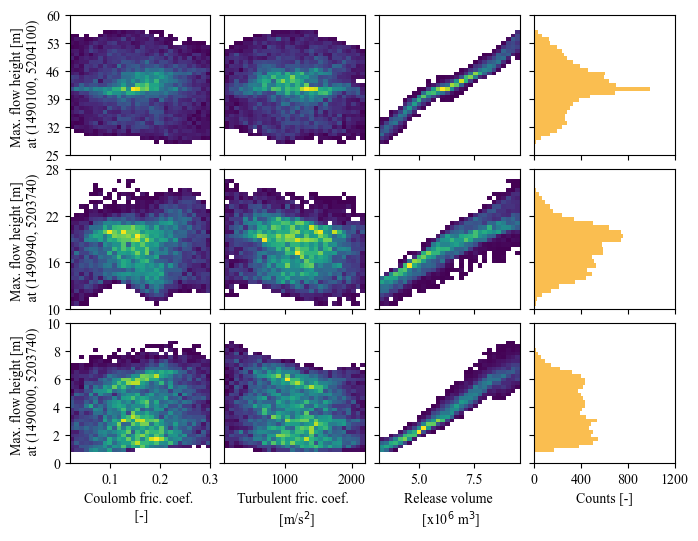

In [8]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(
    3, 4, figsize=(18/2.54, 14/2.54),sharex='col', sharey='row', squeeze=True)

ax1.hist2d(input_mcs3['coulomb'], predicted1['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax1.set_ylim(25,60)
ax1.set_yticks(np.arange(25,61,7))
ax1.set_xlim(0.02,0.3)
ax1.set_ylabel('Max. flow height [m] \n at (1490100, 5204100)')
#ax1.set_xlabel('Coulomb fric. coef. \n [-]')

ax2.hist2d(input_mcs3['turbulent'], predicted1['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax2.set_ylim(25,60)
ax2.set_xlim(100,2200)
#ax2.set_xlabel('Turbulent fric. coef. \n [m/s$^2$]')

ax3.hist2d(input_mcs3['volume'], predicted1['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax3.set_ylim(25,60)
ax3.set_xlim(6.4/2,6.4*1.5)
#ax3.set_xlabel('Release volume \n [x10$^6$ m$^3$]')

ax4.hist(predicted1['hmax'], bins=30, color='#FABE50' ,label='Deposit area', orientation='horizontal')
#ax4.set_xlabel('Counts [-]')
ax4.set_xlim(0,1200)
#ax4.set_xticks(np.arange(0,1201,400))
#ax4.tick_params(labelbottom=True)
#ax4.axes.xaxis.set_ticklabels([])

ax5.hist2d(input_mcs3['coulomb'], predicted2['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax5.set_ylim(10,30)
ax5.set_yticks(np.arange(10,31,6))
ax5.set_xlim(0.02,0.3)
ax5.set_ylabel('Max. flow height [m] \n at (1490940, 5203740)')
#ax5.set_xlabel('Coulomb fric. coef. \n [-]')

ax6.hist2d(input_mcs3['turbulent'], predicted2['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax6.set_ylim(10,28)
ax6.set_xlim(100,2200)
#ax6.set_xlabel('Turbulent fric. coef. \n [m/s$^2$]')

ax7.hist2d(input_mcs3['volume'], predicted2['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax7.set_ylim(10,28)
ax7.set_xlim(6.4/2,6.4*1.5)
#ax7.set_xlabel('Release volume \n [x10$^6$ m$^3$]')

ax8.hist(predicted2['hmax'], bins=30, color='#FABE50' ,label='Deposit area', orientation='horizontal')
#ax8.set_xlabel('Counts [-]')
ax8.set_xlim(0,1200)
#ax8.set_xticks(np.arange(0,1201,400))
#ax8.tick_params(labelbottom=True)
#ax8.axes.xaxis.set_ticklabels([])

ax9.hist2d(input_mcs3['coulomb'], predicted3['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax9.set_ylim(0,10)
ax9.set_yticks(np.arange(0,11,2))
ax9.set_xlim(0.02,0.3)
ax9.set_ylabel('Max. flow height [m] \n at (1490000, 5203740)')
ax9.set_xlabel('Coulomb fric. coef. \n [-]')

ax10.hist2d(input_mcs3['turbulent'], predicted3['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax10.set_ylim(0,10)
ax10.set_xlim(100,2200)
ax10.set_xlabel('Turbulent fric. coef. \n [m/s$^2$]')

ax11.hist2d(input_mcs3['volume'], predicted3['hmax'],cmap='viridis',cmin=1,cmax=3000, bins=30)
ax11.set_ylim(0,10)
ax11.set_xlim(6.4/2,6.4*1.5)
ax11.set_xlabel('Release volume \n [x10$^6$ m$^3$]')

ax12.hist(predicted3['hmax'], bins=30, color='#FABE50' ,label='Deposit area', orientation='horizontal')
ax12.set_xlabel('Counts [-]')
ax12.set_xlim(0,1200)
ax12.set_xticks(np.arange(0,1201,400))
ax12.axes.xaxis.set_ticklabels([0,400,800,1200])
ax12.tick_params(labelbottom=True)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.tight_layout()

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig('fig1.eps', format='eps', facecolor='white',bbox_inches='tight')